In [3]:
import pandas as pd
import numpy as np

import warnings

from pathlib import Path

import matplotlib.pyplot as plt

data_path = Path('./data')
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv(data_path / 'house.csv')

Ejercicio 1

Usando el conjunto de datos de 'houses' usado en la teoría, implementa el código necesario para:

Añade una nueva columna al DF con nombre 'price_grp'. Esta columna tendrá valores entre 0 y 5, siendo 0 el 20% de fila con el precio más barato, y 5, el 20% de casas con el precio más caro.
Comprueba si hay valores missings, y si es así, sustituyelo por otro valor.
¿Cuál es el precio medio de las casas?

In [15]:
data['price_grp'] = pd.qcut(data['price'], q = 5, labels = [0,1,2,3,4])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_grp
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,4
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,3


In [18]:
data.fillna(0).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_grp
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,4
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,3


In [19]:
data['price'].mean()

551962.9884732141

Ejercicio 2

Genera un dataframe que contenga el número medio de baños ('bathrooms') y plantas ('floors') por cada valor de la variable 'condition'.

Genera otro dataframe con el precio min y máximo (mayores que 0) por cada valor de la variable 'condition'.

Une ambos dataframes para tener un último DF con toda la info

In [35]:
grp1 = data.groupby('condition').agg({
    'bathrooms' : 'mean',
    'floors' : np.mean
})
grp1

,bathrooms,floors
condition,,
1,1.166667,1.083333
2,1.437500,1.156250
3,2.276957,1.651130
4,1.935903,1.277157
5,2.107471,1.301149


In [24]:
grp2 = data.where(data['price'] > 0).groupby('condition').agg({
    'price' : ['min','max']
})
grp2

price            
               min         max
condition                     
1.0         7800.0    550000.0
2.0        80000.0   2555000.0
3.0        83000.0  12899000.0
4.0        83300.0  26590000.0
5.0        83300.0   3200000.0

In [30]:
grp = pd.concat([grp1, grp2], axis = 1)
# grp = grp1.join(grp2, on = 'condition')
grp

,bathrooms,floors,"(price, min)","(price, max)"
condition,,,,
1,1.166667,1.083333,7800.0,550000.0
2,1.437500,1.156250,80000.0,2555000.0
3,2.276957,1.651130,83000.0,12899000.0
4,1.935903,1.277157,83300.0,26590000.0
5,2.107471,1.301149,83300.0,3200000.0


In [36]:
grp1.merge(grp2,  left_on='condition')

MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

Ejercicio 3

Genera una pivot table que muestre el precio medio por planta y condición (floors y condition). Es decir, la tabla debe mostrar información del tipo:

 - Las casa con 1 planta y condición 1 tienen de media un precio de 282560€
 - Las casa con 2 planta y condición 3 tienen de media un precio de 622919€

Rellena los valores missings con 0.

Por último, representa los valores de las casas de una planta en un gráfico de barras

In [28]:
pvt = pd.pivot_table(data=data, index='condition', columns='floors', values='price', aggfunc=np.mean)
pvt

floors,1.0,1.5,2.0,2.5,3.0,3.5
condition,,,,,,
1,282560.000000,427000.000000,NaN,NaN,NaN,NaN
2,244226.000000,304077.500000,1.019333e+06,NaN,NaN,NaN
3,446558.941667,526978.427508,6.229194e+05,8.089961e+05,5.258662e+05,829250.0
4,466853.537639,577914.810000,6.882935e+05,1.099125e+06,1.693125e+06,NaN
5,493234.266874,698686.446964,9.978914e+05,2.038333e+06,7.700000e+05,NaN


<Axes: xlabel='condition'>

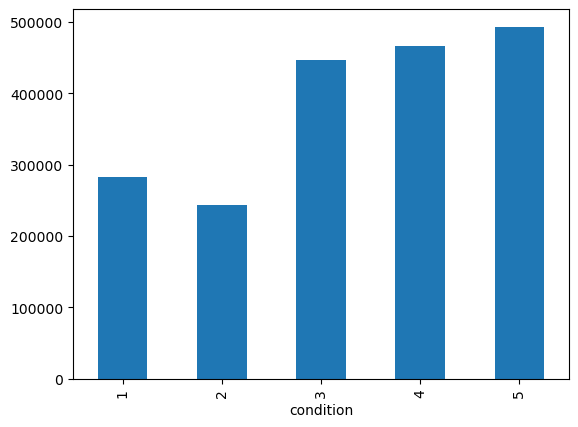

In [38]:
pvt.fillna(0, inplace = True)
pvt[1.0].plot(kind = 'bar')

In [49]:
data.sample(15)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_grp
1673,2014-06-02 00:00:00,5.250000e+05,4.0,2.50,2910,7631,2.0,0,2,3,2910,0,2006,0,25480 SE 275th Pl,Maple Valley,WA 98038,USA,2
4213,2014-07-09 00:00:00,4.800000e+05,5.0,2.75,2550,7725,1.0,0,0,5,1390,1160,1967,0,12570 SE 72nd St,Newcastle,WA 98056,USA,2
1935,2014-06-05 00:00:00,8.750000e+05,3.0,3.50,3250,6000,2.0,0,0,3,2500,750,2001,0,5422 46th Ave SW,Seattle,WA 98136,USA,4
4050,2014-07-08 00:00:00,4.390000e+05,4.0,2.25,2570,9503,2.0,0,0,3,2570,0,1980,0,18719 129th Ct NE,Bothell,WA 98011,USA,2
1135,2014-05-21 00:00:00,5.560000e+05,3.0,3.00,1960,1168,2.0,0,0,3,1600,360,2007,0,1150 NE Park Dr,Issaquah,WA 98029,USA,3
1763,2014-06-03 00:00:00,9.415000e+05,5.0,3.50,3490,9680,2.0,0,4,3,2460,1030,1980,0,20122 Richmond Beach Dr NW,Shoreline,WA 98177,USA,4
827,2014-05-16 00:00:00,2.490000e+05,3.0,2.25,1440,7673,1.0,0,0,3,940,500,1982,0,22119 123rd Ave SE,Kent,WA 98031,USA,0
3975,2014-07-07 00:00:00,7.475000e+05,4.0,2.25,2350,18600,2.0,0,0,4,2350,0,1977,0,16327 Inglewood Pl NE,Kenmore,WA 98028,USA,4
2384,2014-06-12 00:00:00,5.750000e+05,2.0,1.00,1510,4032,1.5,0,0,3,1310,200,1935,1974,2002 28th Ave W,Seattle,WA 98199,USA,3
301,2014-05-07 00:00:00,3.800000e+05,5.0,1.75,3000,6000,1.0,0,0,5,1500,1500,1958,0,8514 S 124th St,Seattle,WA 98178,USA,1
